### Exploratory data analysis on US YouTube dataset

### using the data from https://www.kaggle.com/datasnaek/youtube-new

Context:  
YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

This dataset is a daily record of the top trending YouTube videos.

Note that this dataset is a structurally improved version of this dataset.

Content:  
This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for the US, GB, DE, CA, and FR regions (USA, Great Britain, Germany, Canada, and France, respectively), with up to 200 listed trending videos per day.

Each region’s data is in a separate file. Data includes the video title, channel title, publish time, tags, views, likes and dislikes, description, and comment count.

The data also includes a category_id field, which varies between regions. To retrieve the categories for a specific video, find it in the associated JSON. One such file is included for each of the five regions in the dataset.

For more information on specific columns in the dataset refer to the column metadata.

Acknowledgements:  
This dataset was collected using the YouTube API.

Inspiration:  
Possible uses for this dataset could include:

Sentiment analysis in a variety of forms:  
Categorising YouTube videos based on their comments and statistics.
Training ML algorithms like RNNs to generate their own YouTube comments.
Analysing what factors affect how popular a YouTube video will be.
Statistical analysis over time.
For further inspiration, see the kernels on this dataset!

#### A. Importing Library and data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
df_youtube = pd.read_csv("USvideos.csv")

In [3]:
df_youtube.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


#### B. take a look at the data structure, unique values, and data type

In [4]:
df_youtube.shape

(40949, 16)

In [5]:
df_youtube.nunique()

video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64

In [6]:
df_youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [7]:
df_youtube.category_id.unique()

array([22, 24, 23, 28,  1, 25, 17, 10, 15, 27, 26,  2, 19, 20, 29, 43])

#### C. display some descriptive statistics

In [8]:
df_youtube.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [9]:
print("Views quantiles")
print(df_youtube['views'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Likes quantiles")
print(df_youtube['likes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Dislikes quantiles")
print(df_youtube['dislikes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Comment quantiles")
print(df_youtube['comment_count'].quantile([.01,.25,.5,.75,.99]))

Views quantiles
0.01        4209.84
0.25      242329.00
0.50      681861.00
0.75     1823157.00
0.99    29917344.32
Name: views, dtype: float64

Likes quantiles
0.01        15.00
0.25      5424.00
0.50     18091.00
0.75     55417.00
0.99    923015.92
Name: likes, dtype: float64

Dislikes quantiles
0.01        1.00
0.25      202.00
0.50      631.00
0.75     1938.00
0.99    43562.28
Name: dislikes, dtype: float64

Comment quantiles
0.01         0.0
0.25       614.0
0.50      1856.0
0.75      5755.0
0.99    100603.6
Name: comment_count, dtype: float64


In [10]:
# replace category id with category names  

In [11]:
df_youtube['category_name'] = np.nan

df_youtube.loc[(df_youtube["category_id"] == 1),"category_name"] = 'Film and Animation'
df_youtube.loc[(df_youtube["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df_youtube.loc[(df_youtube["category_id"] == 10),"category_name"] = 'Music'
df_youtube.loc[(df_youtube["category_id"] == 15),"category_name"] = 'Pets and Animals'
df_youtube.loc[(df_youtube["category_id"] == 17),"category_name"] = 'Sport'
df_youtube.loc[(df_youtube["category_id"] == 18),"category_name"] = 'Short Movies'
df_youtube.loc[(df_youtube["category_id"] == 19),"category_name"] = 'Travel and Events'
df_youtube.loc[(df_youtube["category_id"] == 20),"category_name"] = 'Gaming'
df_youtube.loc[(df_youtube["category_id"] == 21),"category_name"] = 'Video Blogging'
df_youtube.loc[(df_youtube["category_id"] == 22),"category_name"] = 'People and Blogs'
df_youtube.loc[(df_youtube["category_id"] == 23),"category_name"] = 'Comedy'
df_youtube.loc[(df_youtube["category_id"] == 24),"category_name"] = 'Entertainment'
df_youtube.loc[(df_youtube["category_id"] == 25),"category_name"] = 'News and Politics'
df_youtube.loc[(df_youtube["category_id"] == 26),"category_name"] = 'How to and Style'
df_youtube.loc[(df_youtube["category_id"] == 27),"category_name"] = 'Education'
df_youtube.loc[(df_youtube["category_id"] == 28),"category_name"] = 'Science and Technology'
df_youtube.loc[(df_youtube["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df_youtube.loc[(df_youtube["category_id"] == 43),"category_name"] = 'Shows'

#### D. Group Analysis by different category names

In [12]:
df_youtube.category_name.value_counts()

Entertainment               9964
Music                       6472
How to and Style            4146
Comedy                      3457
People and Blogs            3210
News and Politics           2487
Science and Technology      2401
Film and Animation          2345
Sport                       2174
Education                   1656
Pets and Animals             920
Gaming                       817
Travel and Events            402
Cars and Vehicles            384
Non Profits and Activism      57
Shows                         57
Name: category_name, dtype: int64

Text(0,0.5,'Count')

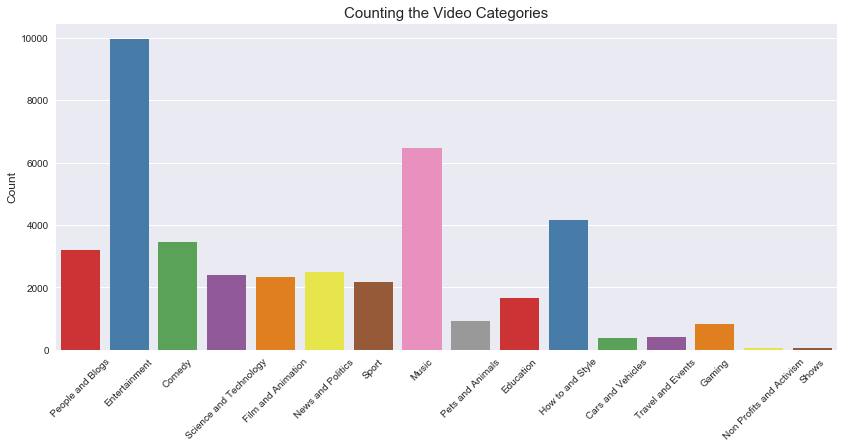

In [13]:
sns.set(rc={'figure.figsize':(14,6)})
g=sns.countplot('category_name',data=df_youtube,palette='Set1')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Categories",fontsize=15)
g.set_xlabel("",fontsize=12)
g.set_ylabel("Count",fontsize=12)

##### we can see that entertainment, music, and how to and style have the most video numbers.

Text(0,0.5,'Views_log')

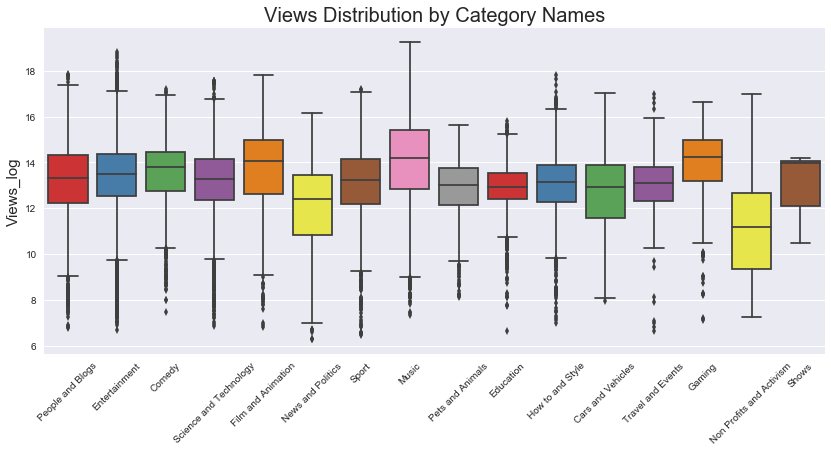

In [17]:
df_youtube['views_log'] = np.log(df_youtube['views'] + 1)
g1=sns.boxplot(x='category_name',y='views_log',data=df_youtube,palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title('Views Distribution by Category Names', fontsize=20)
g1.set_xlabel("",fontsize=15)
g1.set_ylabel('Views_log',fontsize=15)

In [35]:
df_youtube['likes_log'] = np.log(df_youtube['likes'] + 1)
df_youtube['dislikes_log'] = np.log(df_youtube['dislikes'] + 1)
df_youtube['comment_log'] = np.log(df_youtube['comment_count'] + 1)

##### music, film and animation, gaming have the most views, while non profits and activism and news and politics have less views.

#### E. View, Like, Dislike Rate analysis by different category names

In [18]:
df_youtube['like_rate'] =  df_youtube ['likes'] / df_youtube['views'] * 100
df_youtube['dislike_rate'] =  df_youtube ['dislikes'] / df_youtube['views'] * 100
df_youtube['comment_rate'] =  df_youtube ['comment_count'] / df_youtube['views'] * 100

Text(0,0.5,'Like rate')

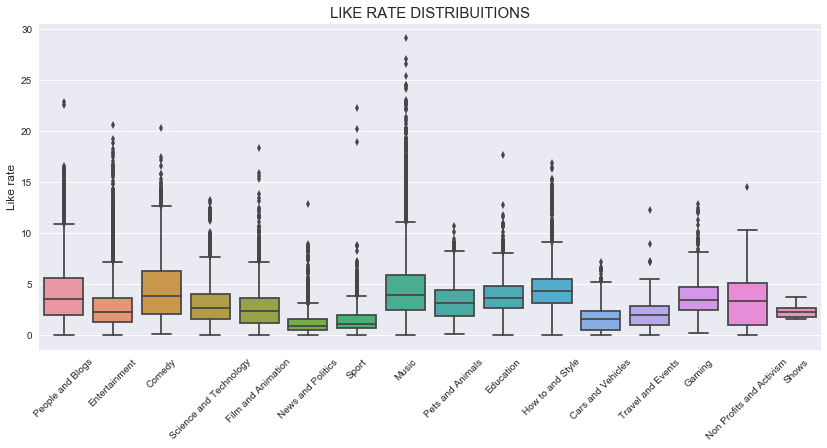

In [20]:
g2= sns.boxplot(x='category_name',y='like_rate',data=df_youtube)
g2.set_xticklabels(g.get_xticklabels(),rotation=45)
g2.set_title("LIKE RATE DISTRIBUITIONS", fontsize=15)
g2.set_xlabel("", fontsize=12)
g2.set_ylabel("Like rate", fontsize=12)

Text(0,0.5,'Dislike rate')

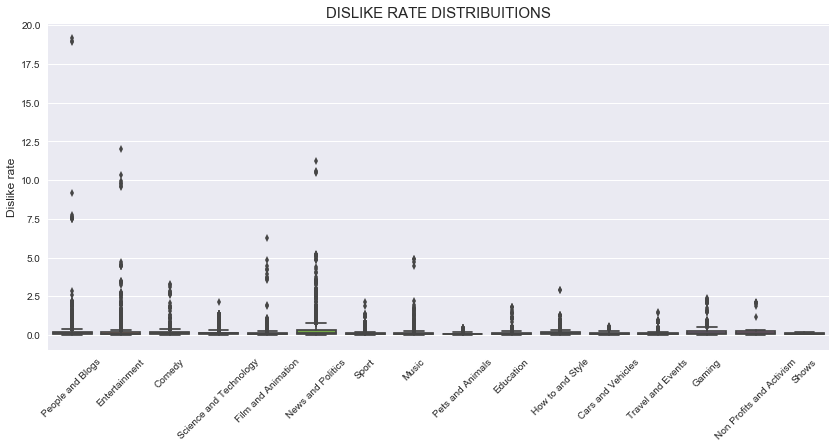

In [29]:
g3= sns.boxplot(x='category_name',y='dislike_rate',data=df_youtube)
g3.set_xticklabels(g.get_xticklabels(),rotation=45)
g3.set_title("DISLIKE RATE DISTRIBUITIONS", fontsize=15)
g3.set_xlabel("", fontsize=12)
g3.set_ylabel("Dislike rate", fontsize=12)

Text(0,0.5,'Comment rate')

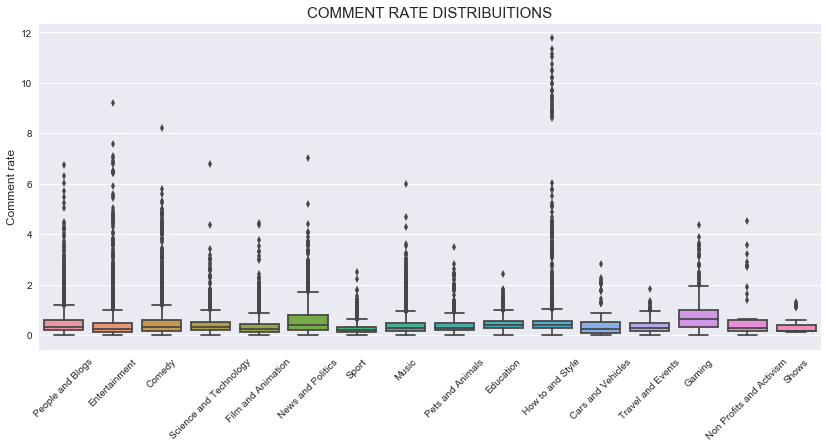

In [30]:
g3= sns.boxplot(x='category_name',y='comment_rate',data=df_youtube)
g3.set_xticklabels(g.get_xticklabels(),rotation=45)
g3.set_title("COMMENT RATE DISTRIBUITIONS", fontsize=15)
g3.set_xlabel("", fontsize=12)
g3.set_ylabel("Comment rate", fontsize=12)

##### Comment:  
##### In general, music, comedy, how to and style have most like rates, align with the fact that they are most popular video forms. News, sport, cars and vehicles have least like rate, which is reasonable.  
##### Dislike rates are generally low for all video forms, with a few outliers including news&politics, entertainment, people&blog.  
##### For comments, news&politics, gaming, and how to and style have high rates.

#### F. Display Correlation Matrix

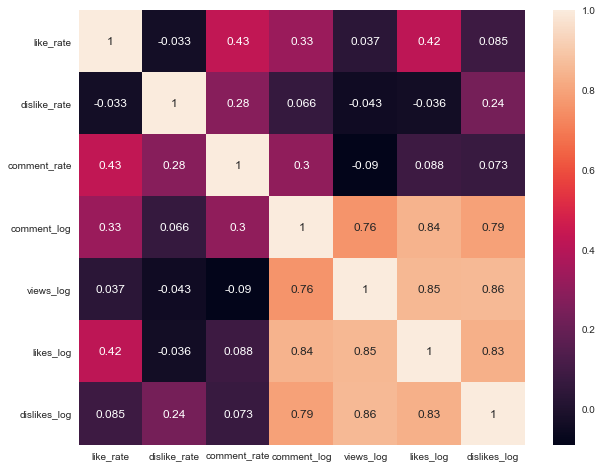

In [36]:
plt.figure(figsize = (10,8))
# correlation for numerical values
sns.heatmap(df_youtube[['like_rate', 'dislike_rate', 'comment_rate', 'comment_log',
         'views_log','likes_log','dislikes_log', "category_name"]].corr(), annot=True)

#### from the above correlation matrix, we can see that veiws and comment, likes and comment, dislikes and comment, views and likes, views and dislikes are all highly correlated.

#### G. Display word cloud

##### word cloud for video title

(-0.5, 399.5, 199.5, -0.5)

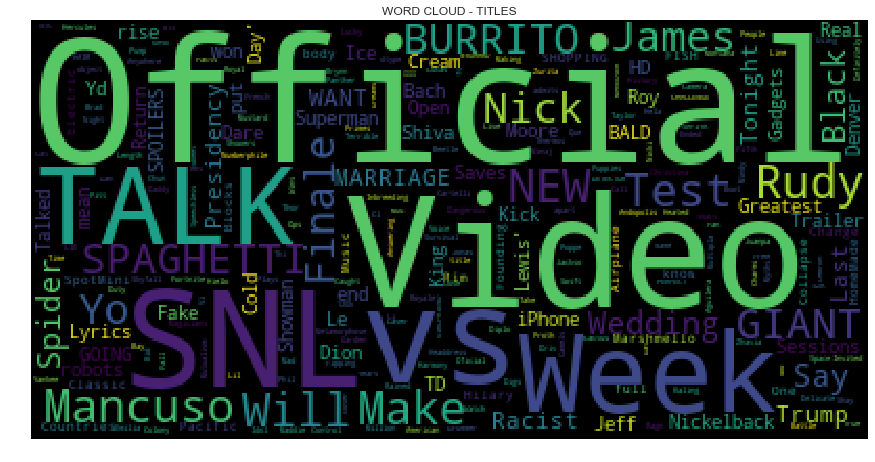

In [37]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_youtube['title']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES")
plt.axis('off')

##### word cloud for video descriptions

(-0.5, 399.5, 199.5, -0.5)

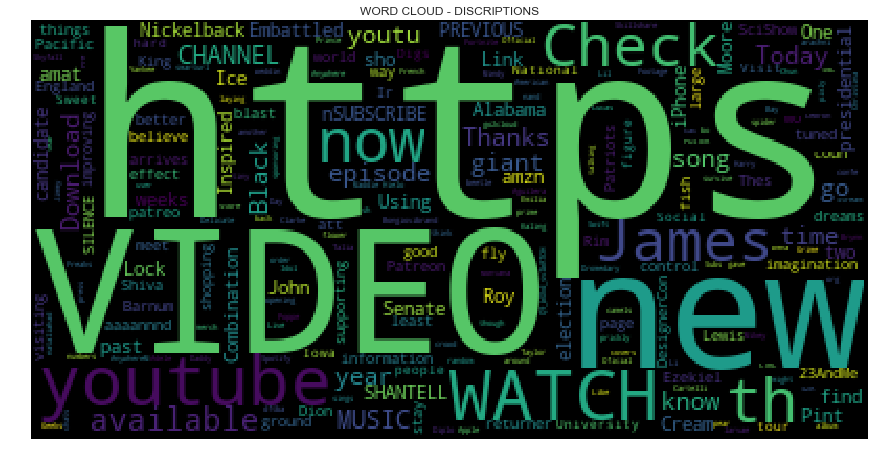

In [38]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_youtube['description']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DISCRIPTIONS")
plt.axis('off')

##### word cloud for video tags

(-0.5, 399.5, 199.5, -0.5)

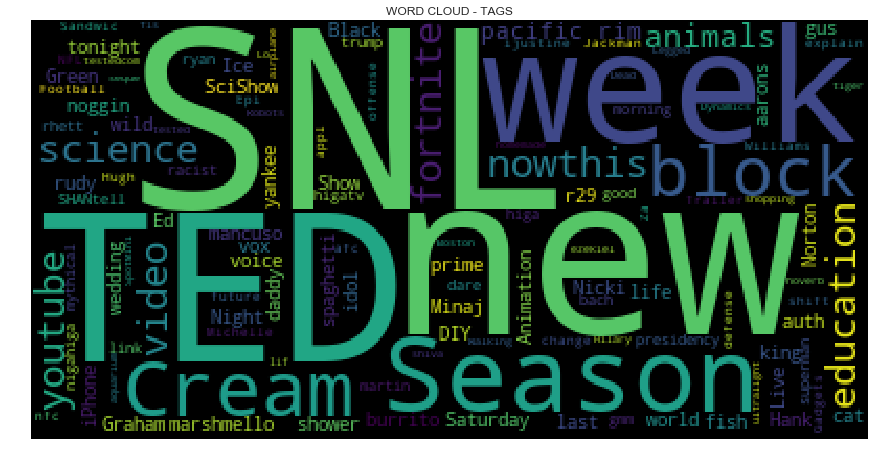

In [40]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_youtube['tags']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TAGS")
plt.axis('off')

##### H. take a look at monthly distribution for number of videos

In [44]:
df_youtube['publish_time'] = pd.to_datetime(df_youtube['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [45]:
df_youtube['month'] = df_youtube['publish_time'].dt.month

In [56]:
df_youtube.month.value_counts()

5     6681
2     6207
12    6182
3     6175
1     5502
4     5092
11    4209
6      769
10      62
9       34
8       26
7       10
Name: month, dtype: int64

Text(0,0.5,'Count')

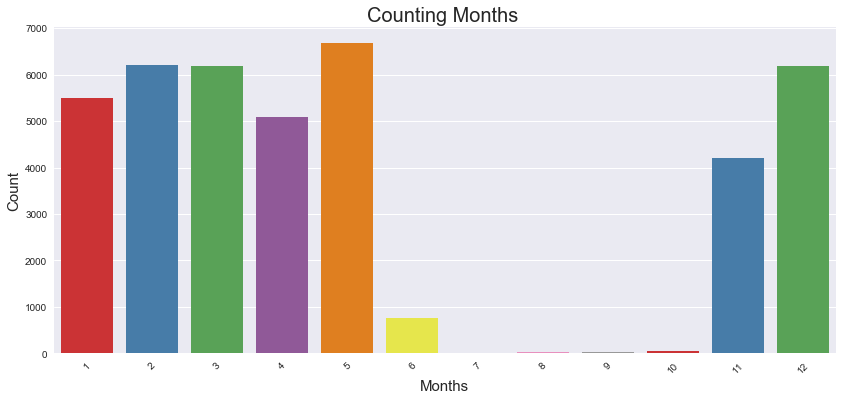

In [47]:
g = sns.countplot('month', data=df_youtube, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Months ", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)

##### June,July,August,September and October suddenly have very few video counts, which is a little odd. my guess is the data is not complete for these months.

##### Note:  
This notebook is learned and adapted from Leonardo Ferreira-Extensive US Youtube [EDA]
https://www.kaggle.com/kabure/extensive-us-youtube-eda/notebook.